## Exercise 01
In this question, you will use the Fashion MNIST dataset and build a custom model using custom training loops (using a different optimizer with a different learning rate for the upper layers and the lower layers) to tackle image classification in the Fashion MNIST dataset.
For example, you can use Sequential model [1] from keras to build your custom model. Please note that Sequential model is suitable for a simple stack of layers with the restriction that each layer can only support exactly one input tensor and one output tensor [1]. Alternatively, you can also use Keras Functional API [2], which allows you to create models that are more flexible than the models created using Sequential model [1]. Some hints are as follows:
1. Only use five epochs and 32 as batch size. x
2. Only use softmax and ReLU activation functions. x
3. Use SGD as the lower optimizer with the learning rate of 1e-4 and Nadam as upper optimizer with a learning rate as 1e-3. x
4. Use Nadam optimizer [3] from Keras and also use sparse categorical cross entropy as a loss function. x
5. Display the mean training loss and the mean accuracy over each epoch (updated at each iteration). Also display, validation loss, and accuracy at the end of each epoch. x

In [40]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras 
import tensorflow_addons as tfa #for tfa to work, a compatible version of tensorflow has to be installed: check https://github.com/tensorflow/addons
import numpy as np
import matplotlib.pyplot as plt
import os

#to make this notebook’s output stable across runs
np.random.seed(42) 
tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() 
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid , X_train = X_train_full [:5000] , X_train_full [5000:]
y_valid , y_train = y_train_full [:5000] , y_train_full [5000:]
X_test = X_test.astype(np.float32) / 255.

In [41]:
#define sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

#define optimizers used in different layers of the model
#legacy used to run more efficient on M1/M2 Macs as suggested by warning
#WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.SGD` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.SGD`.
optimizers = [
    tf.keras.optimizers.legacy.SGD(learning_rate=1e-4), #lower optimizer -> close to input
    tf.keras.optimizers.legacy.Adam(learning_rate=1e-2) #lower optimizer -> close to output
]

#assign optimizers to the layers
optimizers_and_layers = [(optimizers[0], model.layers[0]), (optimizers[1], model.layers[1:])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

#compile with .SparseCategoricalCrossentropy as loss funciton and accuracy as metric (will be later be outputted for every epoch)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [42]:
#fit the model, default batch size is 32, see https://keras.io/api/models/model_training_apis/
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1719/1719 [==============================] - 7s 3ms/step - loss: 0.5321 - accuracy: 0.8097 - val_loss: 0.4629 - val_accuracy: 0.8328
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8416 - val_loss: 0.4567 - val_accuracy: 0.8466
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4201 - accuracy: 0.8484 - val_loss: 0.4001 - val_accuracy: 0.8586
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4105 - accuracy: 0.8521 - val_loss: 0.3962 - val_accuracy: 0.8628
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3996 - accuracy: 0.8565 - val_loss: 0.4023 - val_accuracy: 0.8534


In [43]:
#check accuracy of model on the test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4427 - accuracy: 0.8367 - 455ms/epoch - 1ms/step

Test accuracy: 0.8367000222206116


In [64]:
#functions to plot the predictions from lecture exercise

#use classnames from lecture example
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img, label):
  true_label, img = label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]))
                   
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  


1/1 [==============================] - 0s 44ms/step


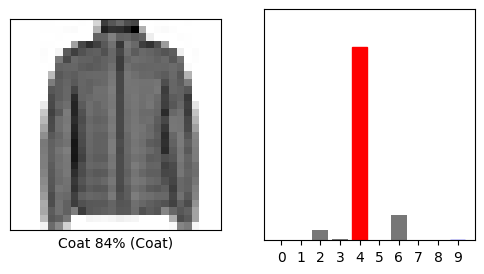

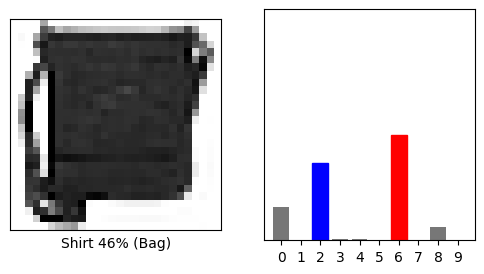

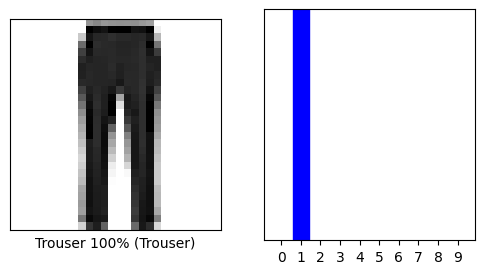

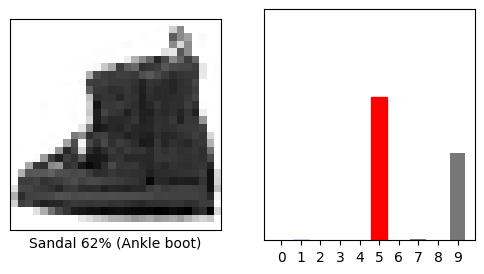

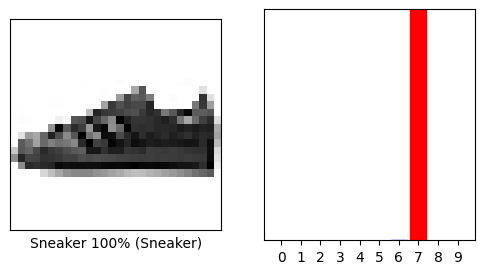

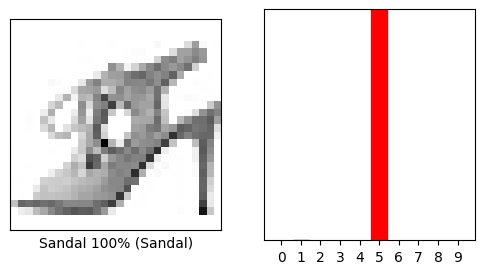

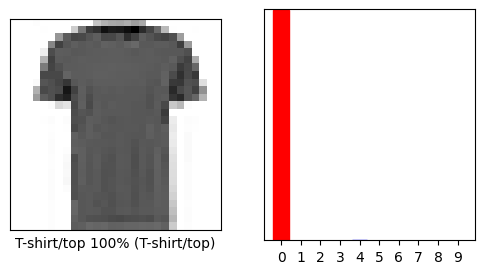

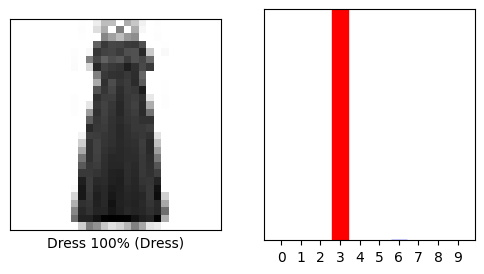

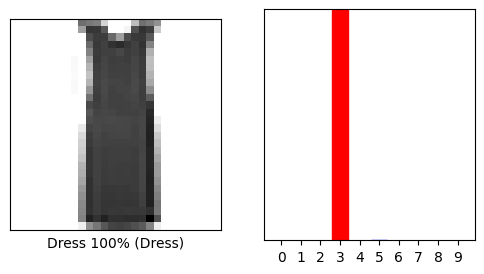

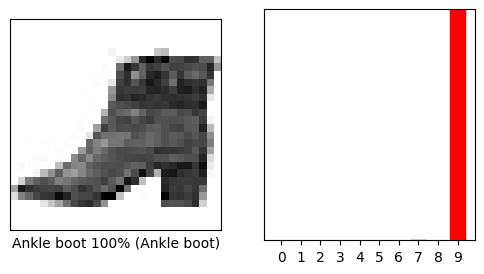

In [67]:
import numpy as np
#make predictions
import matplotlib.pyplot as plt


# Randomly choose 10 indexes from X_test
num_images = 10
indexes = np.random.choice(len(X_test), size=num_images, replace=False)
test_images = X_test[indexes]
label = y_test[indexes]
pred = model.predict(test_images)

for i in range(num_images):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, pred[i], y_test, test_images, label)
    plt.subplot(1,2,2)
    plot_value_array(i, pred[i],  y_test)
    plt.show()